<a href="https://colab.research.google.com/github/Bharath-kumar4703/OTP-Verification-System-Using-Python/blob/main/Netflix_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/netflix_new.csv')
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# **Explore the Data**

In [ ]:
data.shape

(8790, 10)

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [ ]:
data.dtypes

,0
show_id,object
type,object
title,object
director,object
country,object
date_added,object
release_year,int64
rating,object
duration,object
listed_in,object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.head(3)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"


# **Data Preprocessing**

In [ ]:
data['date'] = pd.to_datetime(data['date_added']).dt.strftime('%d-%m-%Y')

In [ ]:
data.drop(columns=['date_added'],inplace=True)
data.head(3)

,show_id,type,title,director,country,release_year,rating,duration,listed_in,date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,25-09-2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",24-09-2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",24-09-2021


# **Find Out the Insights and Pattrens**

<ipython-input-35-93a2cee63144>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type',data=data,palette = 'Set3')


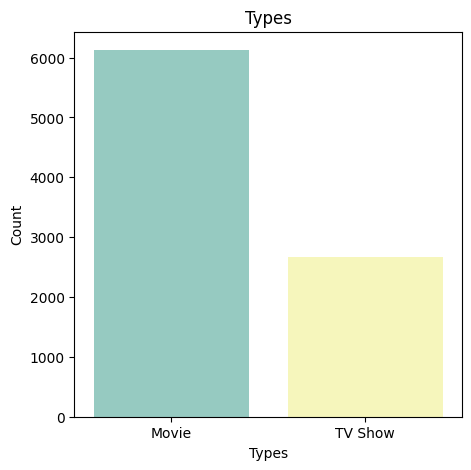

In [ ]:
# what are the unique content types

plt.figure(figsize=(5,5))
plt.title('Types')
sns.countplot(x='type',data=data,palette = 'Set3')
plt.xlabel('Types')
plt.ylabel('Count')
plt.show()

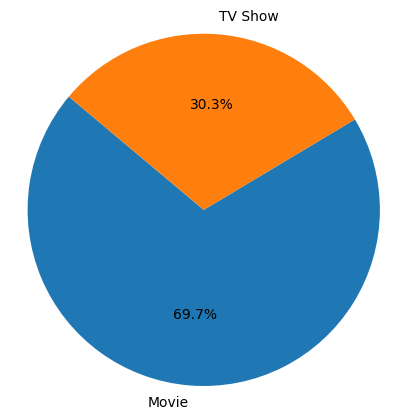

In [ ]:
# Percentage of TV Show and Movies

unique = data['type'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(unique, labels=unique.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
data['director'].value_counts()

,count
director,
Not Given,2588
Rajiv Chilaka,20
Alastair Fothergill,18
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
...,...
Mark Risley,1
Kirati Nakintanon,1
Christian De Vita,1


<ipython-input-47-f22bac9a89ca>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Rating', x='Count', data=High_df, palette='Set2')  # Use barplot instead of countplot


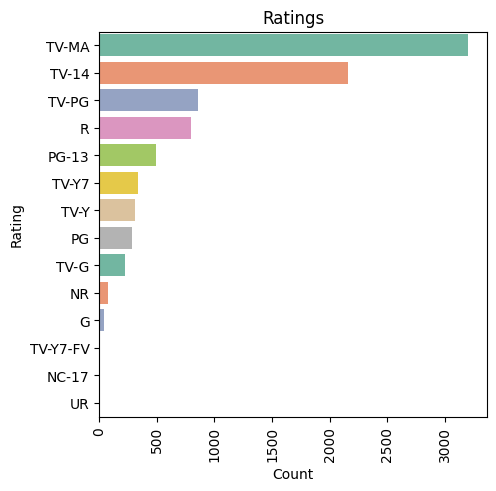

In [ ]:
# Different Rating and which ones highest

High = data['rating'].value_counts().sort_values(ascending=False)
High_df = High.reset_index()  # Convert the Series to DataFrame
High_df.columns = ['Rating', 'Count']  # Rename columns for clarity

plt.figure(figsize=(5,5))
sns.barplot(y='Rating', x='Count', data=High_df, palette='Set2')  # Use barplot instead of countplot
plt.title('Ratings')
plt.xlabel('Count')
plt.xticks(rotation='vertical')
plt.show()


<ipython-input-36-bf90bb41833a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='country' , x='count', data = top_10, palette='Set3')


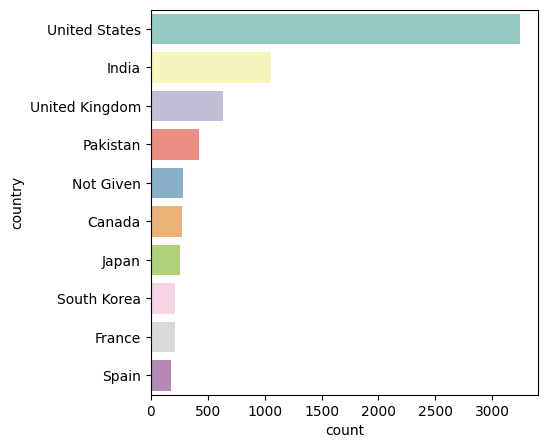

In [ ]:
# Top 10 Countries watching Netflix More

top_10 = data['country'].value_counts().head(10).reset_index()
top_10.columns = ['country','count']
plt.figure(figsize=(5,5))
sns.barplot(y='country' , x='count', data = top_10, palette='Set3')
plt.show()

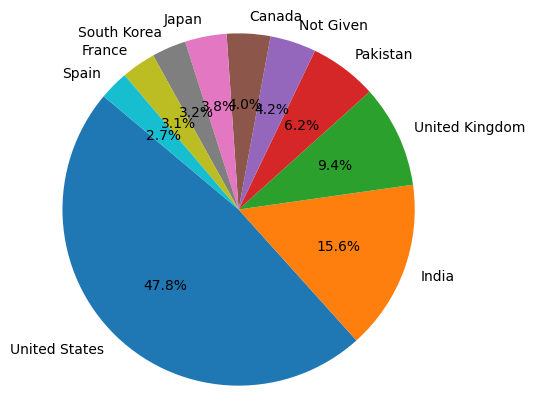

In [ ]:
# Represent in piechart

top_10 = data['country'].value_counts().head(10).reset_index()
top_10_columns = ['country','count']
plt.figure(figsize=(5,5))
plt.pie(top_10['count'],labels=top_10['country'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
data.head(5)

,show_id,type,title,director,country,release_year,rating,duration,listed_in,date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,25-09-2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",24-09-2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",24-09-2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,TV-PG,91 min,"Children & Family Movies, Comedies",22-09-2021
4,s8,Movie,Sankofa,Haile Gerima,United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",24-09-2021


In [ ]:
# Average movie time

movie_data = data[data['type']=='Movie'].copy()
movie_data['duration'] = movie_data['duration'].str.replace('min','',regex=False).astype('float')
avg_movie_time = movie_data['duration'].mean()
print("avg_time_of_movie",round(avg_movie_time))

# movie_data = data[data['type']=='Movie']
# movie_data['duration'] = movie_data['duration'].str.extract('(\d+)')
# movie_data['duration'] = movie_data['duration'].astype('int')
# avg_movie_time = movie_data['duration'].mean()
# print(round(avg_movie_time))

avg_time_of_movie 100


In [ ]:
# Average TV Show time

tv_data = data[data['type'] == 'TV Show'].copy()  # make a copy to avoid warnings

# Step 1: Convert to uppercase
tv_data['duration'] = tv_data['duration'].str.upper()

# Step 2: Remove non-digit characters like " SEASON" or " SEASONS"
tv_data['duration'] = tv_data['duration'].str.extract('(\d+)')  # extract numeric part

# Step 3: Convert to int
tv_data['duration'] = tv_data['duration'].astype(int)

# Step 4: Get the average
avg_tv_time = tv_data['duration'].mean()
print(round(avg_tv_time))


2


<ipython-input-59-3712ba193e94>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Avg_Duration', data=avg_data, palette='plasma')


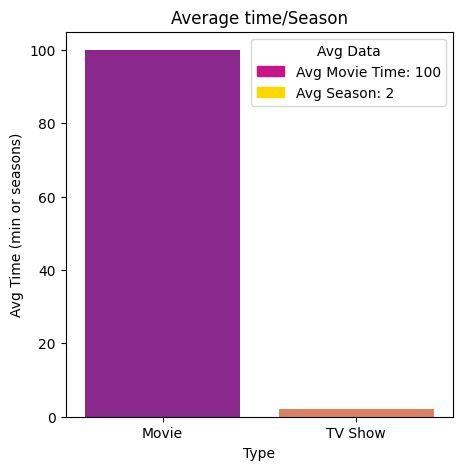

In [ ]:
#Visualize this data

from matplotlib.patches import Patch

avg_movie_time = 100
avg_tv_time = 2

avg_data = pd.DataFrame({
    'Type': ['Movie','TV Show'],
    'Avg_Duration': [avg_movie_time,avg_tv_time]
})

plt.figure(figsize=(5,5))
sns.barplot(x='Type', y='Avg_Duration', data=avg_data, palette='plasma')
plt.title('Average time/Season')
plt.ylabel('Avg Time (min or seasons)')

# Custom Legend
legend_labels = [Patch(color='mediumvioletred', label='Avg Movie Time: 100'),
                 Patch(color='gold', label='Avg Season: 2')]
plt.legend(handles=legend_labels, title='Avg Data')

plt.show()


<ipython-input-33-a617fbd680da>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Top_10_genre,x='listed_in',y='count',palette='plasma')


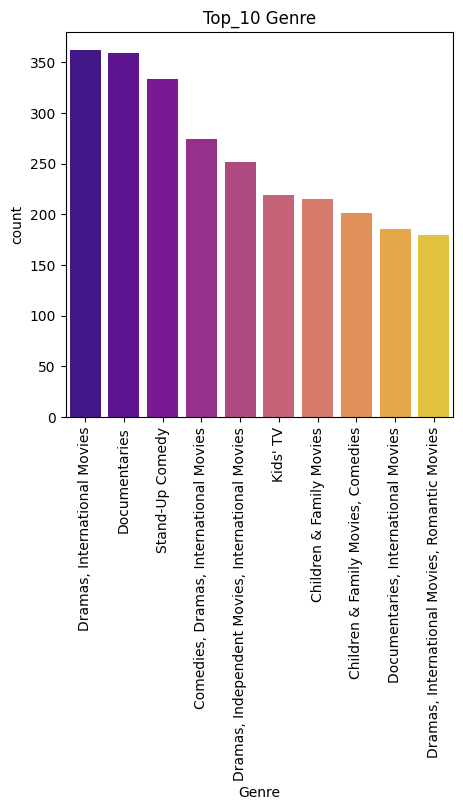

In [ ]:
Top_10_genre = data['listed_in'].value_counts().head(10).reset_index()
Top_10_genre.columns = ['listed_in','count']

plt.figure(figsize=(5,5))
sns.barplot(data=Top_10_genre,x='listed_in',y='count',palette='plasma')
plt.title('Top_10 Genre')
plt.xlabel('Genre')
plt.ylabel('count')
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
data.head(6)

,show_id,type,title,director,country,release_year,rating,duration,listed_in,date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,25-09-2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",24-09-2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",24-09-2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,TV-PG,91 min,"Children & Family Movies, Comedies",22-09-2021
4,s8,Movie,Sankofa,Haile Gerima,United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",24-09-2021
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",24-09-2021
